### Sentiment Analysis
We will be analysing a sentiment analysis problem Airline tweets data. This is a multi class classification having an imbalanced data. 

In [19]:
import pandas as pd
import numpy as np
import re

from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, classification_report

#For data visualisation
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
df_ = pd.read_csv('AirlineTweets.csv')
df_.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [21]:
df = df_[['airline_sentiment','text']]
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


### Preprocessing and cleaning of text data

In [22]:
def remove_tag_words(text):
    result = re.sub('\@\w+','',text)
    return result

def remove_html_in_text(text):
    result_wo_chars = re.sub(r'https?://\S+|www\.\S+','', text)
    result = re.sub('\&\w+','',result_wo_chars)
    return result

def remove_numbers(text):
    result = re.sub(r'\d+','',text)
    return result

def lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    lemmas = [lemmatizer.lemmatize(t) for t in tokens]
    return " ".join(lemmas)

def remove_stop_words(text):
    stop_words = stopwords.words('english')
    tokens = word_tokenize(text)
    words = [t for t in tokens if t not in stop_words]
    return " ".join(words)

def remove_punctuation(text):
    punctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
    for punc in punctuation:
        text.replace(punc,'')
    return text

def extract_only_letters(text):
    text = re.sub('[^a-zA-Z]+', ' ', text).strip()
    return text

In [23]:
df['text'] = df['text'].apply(lambda x: remove_tag_words(x))
df['text'] = df['text'].apply(lambda x: remove_html_in_text(x))
df['text'] = df['text'].apply(lambda x: remove_numbers(x))
df['text'] = df['text'].apply(lambda x: remove_punctuation(x))
df['text'] = df['text'].apply(lambda x: extract_only_letters(x))
df['text'] = df['text'].apply(lambda x: lemmatize(x))
df['text'] = df['text'].apply(lambda x: remove_stop_words(x))

C:\Users\varakhedi\AppData\Local\Temp\ipykernel_20696\2042120263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: remove_tag_words(x))
C:\Users\varakhedi\AppData\Local\Temp\ipykernel_20696\2042120263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: remove_html_in_text(x))
C:\Users\varakhedi\AppData\Local\Temp\ipykernel_20696\2042120263.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

## Categorizing of the data

In [24]:
target_map={'negative':0, 'positive': 1, 'neutral': 2}
df['target'] = df['airline_sentiment'].map(target_map)
vectorizer = TfidfVectorizer(max_features = 2000)
X = vectorizer.fit_transform(df['text'])
y = df['target']

C:\Users\varakhedi\AppData\Local\Temp\ipykernel_20696\3776861599.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df['airline_sentiment'].map(target_map)


## Checking data for class imbalance

<AxesSubplot:xlabel='target', ylabel='count'>

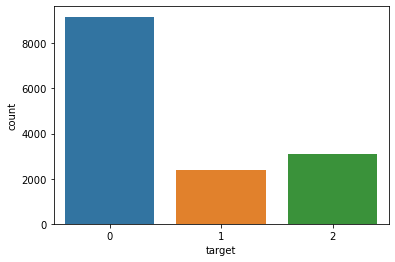

In [25]:
sns.countplot(data = df, x = 'target')

As we can see from the above histogram that there is a class imbalance towards negative tweets. 

## Checking model performances with imbalanced data

### Logistic Regression Model

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 0)
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
print("Classification report Logistic Regression without resampling- \n\n", classification_report(y_train, y_train_pred))
f1_train_lr = round(f1_score(y_train, y_train_pred, average='micro')*100,2)
print( "\n\n F1 Score - ", f1_train_lr)

Classification report Logistic Regression without resampling- 

               precision    recall  f1-score   support

           0       0.85      0.96      0.90      7308
           1       0.87      0.71      0.78      1919
           2       0.79      0.62      0.70      2485

    accuracy                           0.85     11712
   macro avg       0.84      0.76      0.79     11712
weighted avg       0.84      0.85      0.84     11712



 F1 Score -  84.61


In [28]:
y_test_pred = model.predict(X_test)
print("Classification report Logistic Regression without resampling- \n\n", classification_report(y_test, y_test_pred))
f1_lr = round(f1_score(y_test, y_test_pred, average='micro')*100,2)
print( "\n\n F1 Score - ", f1_lr)

Classification report Logistic Regression without resampling- 

               precision    recall  f1-score   support

           0       0.82      0.92      0.87      1870
           1       0.79      0.59      0.68       444
           2       0.66      0.53      0.59       614

    accuracy                           0.79      2928
   macro avg       0.76      0.68      0.71      2928
weighted avg       0.78      0.79      0.78      2928



 F1 Score -  79.13


#### We can see here that the model performed well on training dataset but not testing dataset

Lets try other models for their performance

### Naive Bayes Model

In [31]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_mnb_pred = mnb.predict(X_test)
print("Classification report Naive Bayes with Imbalanced data- \n\n", classification_report(y_test, y_mnb_pred))
f1_mnb = round(f1_score(y_test, y_mnb_pred, average='micro')*100,2)
print( "\n\n F1 Score - ", f1_mnb)

Classification report Naive Bayes with Imbalanced data- 

               precision    recall  f1-score   support

           0       0.75      0.98      0.85      1870
           1       0.87      0.43      0.57       444
           2       0.74      0.31      0.44       614

    accuracy                           0.75      2928
   macro avg       0.79      0.57      0.62      2928
weighted avg       0.76      0.75      0.72      2928



 F1 Score -  75.44


 ### Linear SVC model using OneVsRest classifier

In [16]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

svc = SVC()
ovr_model = OneVsRestClassifier(svc)
ovr_model.fit(X_train, y_train)
y_ovr_pred = ovr_model.predict(X_test)
print("Classification report SVC Model with OVR with balanced data- \n\n", classification_report(y_test, y_ovr_pred))
f1_ovr = round(f1_score(y_test, y_ovr_pred, average='micro')*100,2)
print( "\n\n F1 Score - ", f1_ovr)

Classification report SVC Model with OVR with balanced data- 

               precision    recall  f1-score   support

           0       0.81      0.94      0.87      1870
           1       0.78      0.61      0.68       444
           2       0.70      0.45      0.55       614

    accuracy                           0.79      2928
   macro avg       0.76      0.67      0.70      2928
weighted avg       0.78      0.79      0.77      2928



 F1 Score -  78.76


### Linear SVC model using OneVsOne classifier

In [17]:
from sklearn.multiclass import OneVsOneClassifier
ovo_model = OneVsOneClassifier(svc)
ovo_model.fit(X_train, y_train)
y_ovo_pred = ovo_model.predict(X_test)
print("Classification report SVC Model with OVR with balanced data- \n\n", classification_report(y_test, y_ovo_pred))
f1_ovo = round(f1_score(y_test, y_ovo_pred, average='micro')*100,2)
print( "\n\n F1 Score - ", f1_ovo)

Classification report SVC Model with OVR with balanced data- 

               precision    recall  f1-score   support

           0       0.81      0.94      0.87      1870
           1       0.79      0.60      0.69       444
           2       0.70      0.47      0.56       614

    accuracy                           0.79      2928
   macro avg       0.77      0.67      0.70      2928
weighted avg       0.78      0.79      0.78      2928



 F1 Score -  78.89


In [34]:
model_f1_scores = {"Models": ["LR", "MNB", "SVC:OVR", "SVC:OVO"], "F1 Score" :[ f1_lr, f1_mnb,f1_ovr, f1_ovo] }
df_f1_score = pd.DataFrame(model_f1_scores)
df_f1_score

,Models,F1 Score
0,LR,79.13
1,MNB,75.44
2,SVC:OVR,78.76
3,SVC:OVO,78.89



## Oversampling using SMOTE method

We will use this SMOTE of Oversampling data to overcome the imbalance of target classes amd check performance of all above models.

<AxesSubplot:>

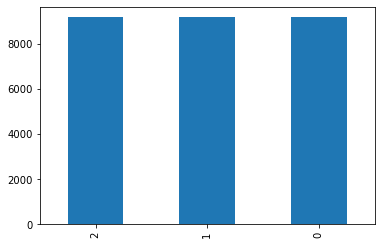

In [35]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state = 0)
X_resample,y_resample = sm.fit_resample(X,y)
y_resample.value_counts().plot(kind='bar')

### Logistic Regression classifier model

In [36]:
X_resample_train, X_resample_test, y_resample_train, y_resample_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state = 1)
model = LogisticRegression(max_iter=500)
model.fit(X_resample_train, y_resample_train)
y_resample_pred = model.predict(X_resample_test)
print("Classification report Logistic Regression- \n\n", classification_report(y_resample_test, y_resample_pred))
f1_lr_sm = round(f1_score(y_resample_test, y_resample_pred, average = 'micro')*100,2)
f1_lr_sm

Classification report Logistic Regression- 

               precision    recall  f1-score   support

           0       0.87      0.81      0.84      1843
           1       0.84      0.77      0.80      1840
           2       0.72      0.83      0.77      1824

    accuracy                           0.80      5507
   macro avg       0.81      0.80      0.80      5507
weighted avg       0.81      0.80      0.80      5507



80.37

### Naive bayes model

In [37]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_resample_train, y_resample_train)
y_mnb_pred = mnb.predict(X_resample_test)
print("Classification report Multinomial Naive Bayes- \n\n", classification_report(y_resample_test, y_mnb_pred))
f1_nb_sm = round(f1_score(y_resample_test, y_mnb_pred, average = 'micro')*100,2)
f1_nb_sm

Classification report Multinomial Naive Bayes- 

               precision    recall  f1-score   support

           0       0.76      0.79      0.78      1843
           1       0.81      0.82      0.81      1840
           2       0.74      0.69      0.71      1824

    accuracy                           0.77      5507
   macro avg       0.77      0.77      0.77      5507
weighted avg       0.77      0.77      0.77      5507



76.92

### Linear SVC model using OneVsRest classifier

In [38]:
ovr_model = OneVsRestClassifier(svc)
ovr_model.fit(X_resample_train, y_resample_train)
y_ovr_sm_pred = ovr_model.predict(X_resample_test)
print("Classification report SVC Model with OVR with balanced data- \n\n", classification_report(y_resample_test, y_ovr_sm_pred))
f1_sm_ovr = round(f1_score(y_resample_test, y_ovr_sm_pred, average='micro')*100,2)
print( "\n\n F1 Score - ", f1_sm_ovr)

Classification report SVC Model with OVR with balanced data- 

               precision    recall  f1-score   support

           0       0.89      0.92      0.90      1843
           1       0.92      0.84      0.87      1840
           2       0.82      0.86      0.84      1824

    accuracy                           0.87      5507
   macro avg       0.87      0.87      0.87      5507
weighted avg       0.87      0.87      0.87      5507



 F1 Score -  87.25


### Linear SVC model using OneVsOne classifier

In [39]:
ovo_model.fit(X_resample_train, y_resample_train)
y_ovo_sm_pred = ovo_model.predict(X_resample_test)
print("Classification report SVC Model with OVR with balanced data- \n\n", classification_report(y_resample_test, y_ovo_sm_pred))
f1_ovo_sm = round(f1_score(y_resample_test, y_ovo_sm_pred, average='micro')*100,2)
print( "\n\n F1 Score - ", f1_ovo_sm)

Classification report SVC Model with OVR with balanced data- 

               precision    recall  f1-score   support

           0       0.84      0.93      0.89      1843
           1       0.92      0.82      0.87      1840
           2       0.83      0.83      0.83      1824

    accuracy                           0.86      5507
   macro avg       0.87      0.86      0.86      5507
weighted avg       0.87      0.86      0.86      5507



 F1 Score -  86.27


In [40]:
model_f1_scores = {"Models": ["LR", "MNB", "SVC:OVR", "SVC:OVO"], "F1 Score" :[ f1_lr, f1_mnb,f1_ovr, f1_ovo], "F1 Scores after SMOTE" : [f1_lr_sm, f1_nb_sm,f1_sm_ovr,f1_ovo_sm] }
df_f1_score = pd.DataFrame(model_f1_scores)
df_f1_score

,Models,F1 Score,F1 Scores after SMOTE
0,LR,79.13,80.37
1,MNB,75.44,76.92
2,SVC:OVR,78.76,87.25
3,SVC:OVO,78.89,86.27


Looking at results we can see that SVC model outperforms other models

### Now let us try the text Augmention method using nlpaug and review the results on how it affects the performance of the model

In [41]:
!pip install transformers
!pip install nlpaug

You should consider upgrading via the 'C:\Supriya\python.exe -m pip install --upgrade pip' command.


     -------------------------------------- 410.8/410.8 KB 2.6 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Supriya\python.exe -m pip install --upgrade pip' command.


In [44]:
import nlpaug.augmenter.word.context_word_embs as aug
augmenter = aug.ContextualWordEmbsAug(model_path = 'bert-base-uncased', action='insert')

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

In [55]:
df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 0)
print(df_train.shape)
print(df_test.shape)

(11712, 3)
(2928, 3)


In [56]:
positive_df = df_train[df_train['target'] == 1]
neutral_df = df_train[df_train['target'] == 2]

In [72]:
augmented_texts = []
for _, row in positive_df.iterrows():
    sentences = augmenter.augment(row['text'], n=2)
    for text in sentences:
        augmented_texts.append(text)
data_positive = {
    'target' : 1,
    'text' : augmented_texts
}

aug_df_positive = pd.DataFrame(data_positive)
aug_df_positive

,target,text
0,1,yes... thankfully catering guys got loading fr...
1,1,yes thankfully my catering crew got loading fr...
2,1,mdw bay san flt first attendant melissa wa at ...
3,1,mdw san jose flt shuttle attendant melissa wa ...
4,1,first in class the way headed
...,...,...
3829,1,but thank guy
3830,1,beautiful view over flying san juan jose ca du...
3831,1,beautiful view all flying san jose air ca by e...
3832,1,hey thanks help with wish phone phone rep coul...


In [73]:
augmented_neutral_texts = []
for _, row in neutral_df.iterrows():
    sentences = augmenter.augment(row['text'], n=2)
    for text in sentences:
        augmented_neutral_texts.append(text)
data_neutral = {
    'target' : 2,
    'text' : augmented_neutral_texts
}

aug_df_neutral = pd.DataFrame(data_neutral)
aug_df_neutral

,target,text
0,2,think that dfw omg oh yeah and cold everywhere
1,2,that dfw mean omg of yeah... cold everywhere
2,2,however many minutes left i min wway
3,2,too many left soon i min wway
4,2,i that i did very little concerned
...,...,...
4957,2,but okay thank
4958,2,sure chance u offer for fresh bottled guacamol...
4959,2,double chance on u offer fresh cut guacamole f...
4960,2,2 followback


In [76]:
df_train = df_train[['target','text']]

In [92]:
df_aug = df_train.append(aug_df_positive)
df_aug = df_aug.append(aug_df_neutral)

C:\Users\varakhedi\AppData\Local\Temp\ipykernel_20696\968878850.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aug = df_train.append(aug_df_positive)
C:\Users\varakhedi\AppData\Local\Temp\ipykernel_20696\968878850.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aug = df_aug.append(aug_df_neutral)


#### Let's check the target class data

In [82]:
df_aug['target'].value_counts()

2    7447
0    7308
1    5753
Name: target, dtype: int64

The positive and neutral class values have increased

In [84]:
vectorizer = TfidfVectorizer(max_features = 2000)
X_aug_train = vectorizer.fit_transform(df_aug['text'])
X_aug_train

<20508x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 166936 stored elements in Compressed Sparse Row format>

In [86]:
X_aug_test = vectorizer.fit_transform(df_test['text'])
X_aug_test

<2928x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 23378 stored elements in Compressed Sparse Row format>

In [87]:
y_aug_train = df_aug['target']
y_aug_test = df_test['target']

### Logistic Regression 

In [90]:
lr = LogisticRegression(max_iter=500)
lr.fit(X_aug_train, y_aug_train)
y_aug_pred = lr.predict(X_aug_test)
print("Classification report Logistic Regression- \n\n", classification_report(y_aug_test, y_aug_pred))
f1_lr_aug = round(f1_score(y_aug_test, y_aug_pred, average = 'micro')*100,2)
f1_lr_aug

Classification report Logistic Regression- 

               precision    recall  f1-score   support

           0       0.62      0.37      0.47      1870
           1       0.15      0.14      0.14       444
           2       0.24      0.53      0.33       614

    accuracy                           0.37      2928
   macro avg       0.34      0.35      0.31      2928
weighted avg       0.47      0.37      0.39      2928



37.16

### Linear SVC model

In [91]:
ovr_aug = OneVsRestClassifier(svc)
ovr_aug.fit(X_aug_train, y_aug_train)
y_ovr_aug_pred = ovr_aug.predict(X_aug_test)
print("Classification report SVC Model with OVR with balanced data- \n\n", classification_report(y_aug_test, y_ovr_aug_pred))
f1_aug_ovr = round(f1_score(y_aug_test, y_ovr_aug_pred, average='micro')*100,2)
print( "\n\n F1 Score - ", f1_aug_ovr)

Classification report SVC Model with OVR with balanced data- 

               precision    recall  f1-score   support

           0       0.63      0.45      0.52      1870
           1       0.15      0.14      0.14       444
           2       0.24      0.48      0.32       614

    accuracy                           0.41      2928
   macro avg       0.34      0.35      0.33      2928
weighted avg       0.48      0.41      0.42      2928



 F1 Score -  40.68


### Looking at the results the Data Augmentation performed worst than expected